In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('/Users/TimothyW/Fun/energy-kaggle/data/train.csv', parse_dates = ['timestamp'])
df_train = df_train.set_index('timestamp')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1749494 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter_reading  float64
 2   anomaly        int64  
dtypes: float64(1), int64(2)
memory usage: 53.4 MB


In [4]:
df_train.index

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 00:00:00',
               '2016-01-01 00:00:00', '2016-01-01 00:00:00',
               '2016-01-01 00:00:00', '2016-01-01 00:00:00',
               '2016-01-01 00:00:00', '2016-01-01 00:00:00',
               '2016-01-01 00:00:00', '2016-01-01 00:00:00',
               ...
               '2016-12-31 23:00:00', '2016-12-31 23:00:00',
               '2016-12-31 23:00:00', '2016-12-31 23:00:00',
               '2016-12-31 23:00:00', '2016-12-31 23:00:00',
               '2016-12-31 23:00:00', '2016-12-31 23:00:00',
               '2016-12-31 23:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=1749494, freq=None)

In [5]:
df_train.building_id.unique()

array([   1,   32,   41,   55,   69,   79,   82,   91,  107,  108,  111,
        112,  117,  118,  119,  121,  136,  137,  139,  141,  144,  147,
        148,  149,  159,  171,  173,  174,  181,  183,  190,  235,  238,
        240,  246,  247,  248,  253,  254,  263,  270,  275,  276,  278,
        290,  293,  312,  318,  335,  345,  356,  423,  439,  492,  534,
        560,  623,  653,  657,  658,  666,  667,  673,  675,  677,  680,
        683,  685,  687,  693,  697,  698,  701,  708,  710,  721,  722,
        729,  730,  732,  739,  742,  801,  827,  844,  848,  879,  880,
        881,  882,  884,  886,  887,  889,  890,  892,  893,  894,  895,
        896,  903,  905,  909,  914,  919,  922,  924,  925,  926,  928,
        929,  931,  935,  936,  941,  942,  945,  948,  950,  952,  961,
        966,  967,  968,  969,  970,  971,  973,  974,  975,  977,  978,
        981,  988,  990,  992,  994,  996, 1001, 1007, 1068, 1073, 1074,
       1106, 1120, 1128, 1137, 1141, 1143, 1147, 11

In [6]:
def plot_timeseries(df, building_id):
    df[(df.building_id == building_id) & (df.anomaly == 0)]['meter_reading'].plot(linestyle = 'None', marker='.')
    df[(df.building_id == building_id) & (df.anomaly == 1)]['meter_reading'].plot(linestyle = 'None', marker='.')
    return None

<AxesSubplot:xlabel='timestamp'>

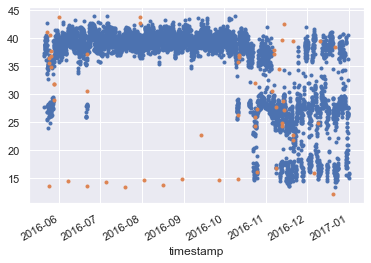

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11,4)})
df_train[(df_train.building_id == 1) & (df_train.anomaly == 0)]['meter_reading'].plot(linestyle = 'None', marker='.')
df_train[(df_train.building_id == 1) & (df_train.anomaly == 1)]['meter_reading'].plot(linestyle = 'None', marker='.')

In [8]:
a = df_train.loc['2016-01-02':'2016-01-03']

In [9]:
a

,building_id,meter_reading,anomaly
timestamp,,,
2016-01-02 00:00:00,1,NaN,0
2016-01-02 00:00:00,32,NaN,0
2016-01-02 00:00:00,41,NaN,0
2016-01-02 00:00:00,55,NaN,0
2016-01-02 00:00:00,69,NaN,0
...,...,...,...
2016-01-03 23:00:00,1316,42.344,0
2016-01-03 23:00:00,1318,73.980,0
2016-01-03 23:00:00,1319,83.996,0


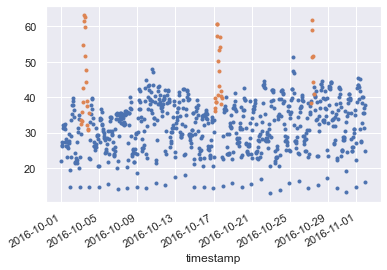

In [10]:
plot_timeseries(df_train.loc['2016-10-01':'2016-11-01'], 55)

In [11]:
df_building_55 = df_train[df_train.building_id == 55]

In [12]:
df_building_55 = df_building_55.sort_index().dropna()

In [13]:
df_building_55

,building_id,meter_reading,anomaly
timestamp,,,
2016-05-20 18:00:00,55,22.407,0
2016-05-20 19:00:00,55,30.509,0
2016-05-20 20:00:00,55,30.109,0
2016-05-20 21:00:00,55,29.909,0
2016-05-20 22:00:00,55,35.310,0
...,...,...,...
2016-12-31 19:00:00,55,36.911,0
2016-12-31 20:00:00,55,41.012,0
2016-12-31 21:00:00,55,43.012,0


### ok lets focus on building 55 and can we apply the LOF?
create features:
meter_reading_that_hour
meter_reading_sum_24hours

In [14]:
df_building_55['reading_sum_last_24'] = df_building_55['meter_reading'].rolling(72,min_periods = 72).sum()
df_building_55['reading_lag_one'] = df_building_55['meter_reading'].shift(1)
df_building_55['diff_lag_one'] = df_building_55['meter_reading'] - df_building_55['reading_lag_one']
df_building_55['last_24_avg'] = df_building_55['meter_reading'].rolling(24, min_periods = 24).mean()
df_building_55['diff_last_24_avg'] = df_building_55['meter_reading'] - df_building_55['last_24_avg']

In [15]:
df_building_55

,building_id,meter_reading,anomaly,reading_sum_last_24,reading_lag_one,diff_lag_one,last_24_avg,diff_last_24_avg
timestamp,,,,,,,,
2016-05-20 18:00:00,55,22.407,0,NaN,NaN,NaN,NaN,NaN
2016-05-20 19:00:00,55,30.509,0,NaN,22.407,8.102,NaN,NaN
2016-05-20 20:00:00,55,30.109,0,NaN,30.509,-0.400,NaN,NaN
2016-05-20 21:00:00,55,29.909,0,NaN,30.109,-0.200,NaN,NaN
2016-05-20 22:00:00,55,35.310,0,NaN,29.909,5.401,NaN,NaN
...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,55,36.911,0,2564.360,36.011,0.900,38.428083,-1.517083
2016-12-31 20:00:00,55,41.012,0,2568.761,36.911,4.101,37.902917,3.109083
2016-12-31 21:00:00,55,43.012,0,2575.162,41.012,2.000,37.452750,5.559250


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='meter_reading', ylabel='diff_last_24_avg'>

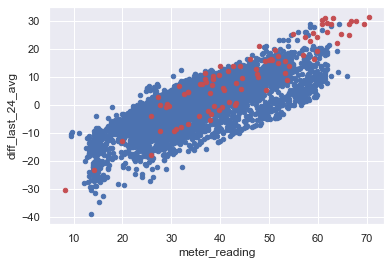

In [16]:
ax = df_building_55[df_building_55.anomaly == 0].plot.scatter('meter_reading', 'diff_last_24_avg')
df_building_55[df_building_55.anomaly == 1].plot.scatter('meter_reading', 'diff_last_24_avg', c='r',ax = ax)

### Ok this is going to be trickier than detecting glastonbury
Try a couple of sampling techniques + the all mighty catboost and evaluea

In [17]:
df_train_features =  pd.read_csv('/Users/TimothyW/Fun/energy-kaggle/data/train_features.csv', parse_dates = ['timestamp'])

In [18]:
df_train_features = df_train_features.set_index('timestamp')

In [19]:
df_train_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1749494 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 56 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   building_id                    int64  
 1   meter_reading                  float64
 2   anomaly                        int64  
 3   site_id                        int64  
 4   primary_use                    object 
 5   square_feet                    int64  
 6   year_built                     int64  
 7   floor_count                    int64  
 8   air_temperature                float64
 9   cloud_coverage                 int64  
 10  dew_temperature                float64
 11  precip_depth_1_hr              int64  
 12  sea_level_pressure             float64
 13  wind_direction                 int64  
 14  wind_speed                     float64
 15  air_temperature_mean_lag7      float64
 16  air_temperature_max_lag7       float64
 17  air_temperatu

In [20]:
df_train_features[df_train_features.building_id == 55]['hour']

timestamp
2016-01-01 00:00:00     0
2016-01-01 01:00:00     1
2016-01-01 02:00:00     2
2016-01-01 03:00:00     3
2016-01-01 04:00:00     4
                       ..
2016-12-31 19:00:00    19
2016-12-31 20:00:00    20
2016-12-31 21:00:00    21
2016-12-31 22:00:00    22
2016-12-31 23:00:00    23
Name: hour, Length: 8784, dtype: int64

In [21]:
features = ['meter_reading','air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed','hour','weekday']
other = ['building_id','anomaly']

In [22]:
df_train_subset = df_train_features[features + other]

In [23]:
df_train_clean = df_train_subset.dropna(subset = 'meter_reading')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_train_clean[features]
y = df_train_clean[['anomaly']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 69)

#### Now we need a balancing technique, lets start with simple undersampling

In [28]:
from imblearn.under_sampling import RandomUnderSampler

In [29]:
rus = RandomUnderSampler(random_state=69)

In [30]:
X_tr_res, y_tr_res = rus.fit_resample(X_train, y_train)

In [31]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
clf = AdaBoostClassifier(n_estimators = 50)

In [33]:
from sklearn.metrics import RocCurveDisplay

In [38]:
def train_test_display(X_tr, y_tr, X_te, y_te, clf_):
    clf_.fit(X_tr.values, y_tr['anomaly'].values )
    print("done fitting")
    y_pr = clf.decision_function(X_te.values)
    RocCurveDisplay.from_predictions(y_te, y_pr)
    return clf_

done fitting


AdaBoostClassifier()

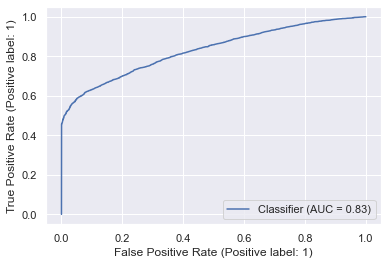

In [39]:
train_test_display(X_tr_res, y_tr_res,X_test,y_test, clf)

### Try smote instead

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
sm = SMOTE(random_state = 69)

In [42]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)

In [43]:
y_train_new.value_counts()

anomaly
0          1283615
1          1283615
dtype: int64

In [44]:
X_train_new_small = X_train_new[:100000]
y_train_new_small = y_train_new[:100000]


done fitting


AdaBoostClassifier()

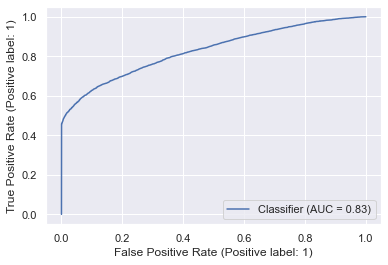

In [45]:
train_test_display(X_train_new_small, y_train_new_small, X_test, y_test, clf)

In [52]:
df_test_sub = pd.read_csv('/Users/TimothyW/Fun/energy-kaggle/data/test_features.csv')

AttributeError: 'DataFrame' object has no attribute 'fillnan'

In [54]:
df_test_sub = df_test_sub.fillna(0)

In [50]:
def create_submission(clf, test_set_features):
    X = test_set_features[features]
    preds = clf.predict(X)
    df_submit = test_set_features[['row_id']]
    df_submit['anomaly'] = preds
    return df_submit

In [56]:
df_submit = create_submission(clf, df_test_sub)

/Users/TimothyW/anaconda3/envs/energy_kaggle/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/var/folders/v3/nvp5qny9761b98yy3p9n041h0000gq/T/ipykernel_91326/2169700057.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_submit['anomaly'] = preds


In [58]:
df_submit.anomaly.value_counts()

0    1782484
1      18083
Name: anomaly, dtype: int64

In [60]:
df_submit.to_csv('submission_1.csv', index=False)

### data processing - output format.
### data processing has to take place in modelling

### group k fold cross validation with adaboost
- group k fold cross validation with SMOTE
- group k fold cross validation with SMOTE + Catboost